In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [68]:
dataset = pd.read_csv('Mall_Customers.csv')

In [69]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [70]:
X = dataset.iloc[:, 3:5].values

In [71]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [72]:
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
# Assuming dataset and X are already defined
X_scaled = StandardScaler().fit_transform(X)
mean_shift = MeanShift(bandwidth=1.5)  # Adjust bandwidth for desired number of clusters
y_mean_shift = mean_shift.fit_predict(X_scaled)

In [73]:
# Create a new DataFrame to hold the original data and cluster labels
supervised_mean_shift = dataset.copy()
supervised_mean_shift['Cluster_group'] = y_mean_shift
supervised_mean_shift.to_csv("cluster_meanshift.csv", index=False)

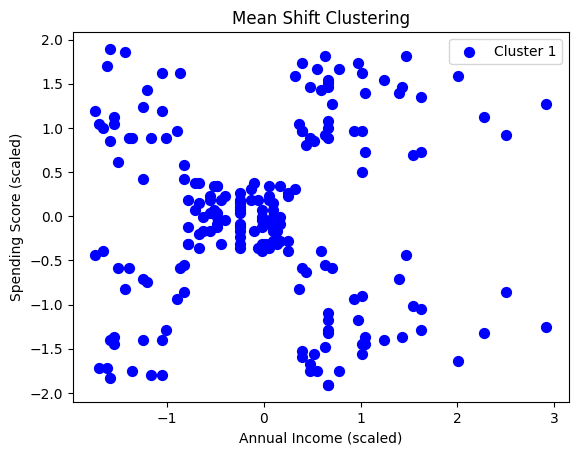

In [74]:
for i, label in enumerate(unique_labels):
    plt.scatter(X_scaled[y_mean_shift == label, 0], X_scaled[y_mean_shift == label, 1],
                s=50, c=colors[i % len(colors)], label=f'Cluster {label + 1}')
plt.title('Mean Shift Clustering')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

C:\Users\Malya\anaconda3\envs\aimlds\lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


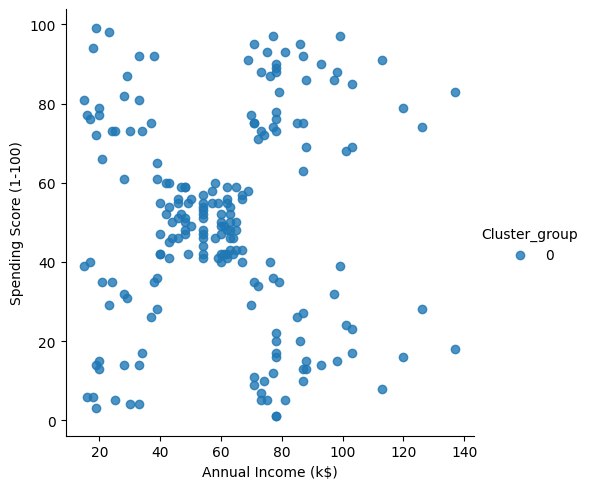

In [75]:
facet_mean_shift = sns.lmplot(data=supervised_mean_shift, x=supervised_mean_shift.columns[3], y=supervised_mean_shift.columns[4], hue='Cluster_group',
                               fit_reg=False, legend=True, legend_out=True)